In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot
df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [6]:
cols = ["Suburb", "Rooms", "Type", "Method", "SellerG", "Regionname", "Propertycount", "Distance",
        "CouncilArea", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "Price"]

df = df[cols]
df

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra,2.0,1.0,1.0,202.0,NaN,1480000.0
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra,2.0,1.0,0.0,156.0,79.0,1035000.0
2,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra,3.0,2.0,0.0,134.0,150.0,1465000.0
3,Abbotsford,3,h,PI,Biggin,Northern Metropolitan,4019.0,2.5,Yarra,3.0,2.0,1.0,94.0,NaN,850000.0
4,Abbotsford,4,h,VB,Nelson,Northern Metropolitan,4019.0,2.5,Yarra,3.0,1.0,2.0,120.0,142.0,1600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,S,Barry,South-Eastern Metropolitan,7392.0,16.7,NaN,4.0,2.0,2.0,652.0,NaN,1245000.0
13576,Williamstown,3,h,SP,Williams,Western Metropolitan,6380.0,6.8,NaN,3.0,2.0,2.0,333.0,133.0,1031000.0
13577,Williamstown,3,h,S,Raine,Western Metropolitan,6380.0,6.8,NaN,3.0,2.0,4.0,436.0,NaN,1170000.0
13578,Williamstown,4,h,PI,Sweeney,Western Metropolitan,6380.0,6.8,NaN,4.0,1.0,5.0,866.0,157.0,2500000.0


In [7]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          0
Propertycount       0
Distance            0
CouncilArea      1369
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
Price               0
dtype: int64

In [8]:
df.dtypes

Suburb            object
Rooms              int64
Type              object
Method            object
SellerG           object
Regionname        object
Propertycount    float64
Distance         float64
CouncilArea       object
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
Price            float64
dtype: object

<AxesSubplot:xlabel='CouncilArea', ylabel='count'>

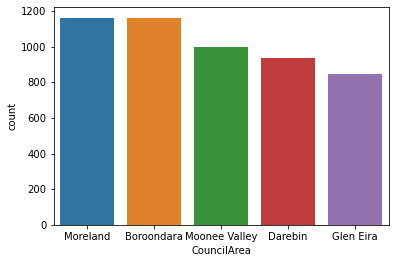

In [9]:
sns.countplot(x=df['CouncilArea'], order=df['CouncilArea'].value_counts().iloc[:5].index)

In [10]:
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())
df['CouncilArea'] = df['CouncilArea'].fillna("Moreland")

In [11]:
df.dropna(inplace=True)
df.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [12]:
df = pd.get_dummies(df, drop_first=True)
df.columns

Index(['Rooms', 'Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Price', 'Suburb_Aberfeldie',
       ...
       'CouncilArea_Moreland', 'CouncilArea_Nillumbik',
       'CouncilArea_Port Phillip', 'CouncilArea_Stonnington',
       'CouncilArea_Unavailable', 'CouncilArea_Whitehorse',
       'CouncilArea_Whittlesea', 'CouncilArea_Wyndham', 'CouncilArea_Yarra',
       'CouncilArea_Yarra Ranges'],
      dtype='object', length=634)

In [13]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
# df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10814, 633), (2704, 633), (10814,), (2704,))

In [16]:
scaler = StandardScaler()
scaler2 = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# scaler2.fit(y_train)
# y_train = scaler2.transform(y_train)
# y_test = scaler2.transform(y_test)

In [17]:
y_train.shape, y_test.shape

((10814,), (2704,))

In [18]:
linreg = LinearRegression().fit(X_train, y_train)
linreg.score(X_train, y_train)

0.7026865675270082

In [ ]:
linreg.score(X_test, y_test)

-2.3511357603405938e+24

In [31]:
linreg_train_prediction = linreg.predict(X_train)
mse_linreg_train_prediction = mean_squared_error(y_train, linreg_train_prediction)
print(f"MSE training: {mse_linreg_train_prediction}")

MSE training: 121572401514.52011


In [30]:
linreg_test_prediction = linreg.predict(X_test)
mse_linreg_test_prediction = mean_squared_error(y_test, linreg_test_prediction)
print(f"MSE testing: {mse_linreg_test_prediction}")

MSE testing: 9.667420601415559e+35


In [43]:
l1 = Lasso(alpha=50, max_iter=500, tol=0.1).fit(X_train, y_train)
l1.score(X_train, y_train)

0.7047399272594465

In [44]:
l1.score(X_test, y_test)

0.5165083047712113

In [32]:
lasso_train_prediction = l1.predict(X_train)
mse_lasso_train_prediction = mean_squared_error(y_train, lasso_train_prediction)
print(f"MSE training: {mse_lasso_train_prediction}")

MSE training: 120732776234.99829


In [33]:
lasso_test_prediction = l1.predict(X_test)
mse_lasso_test_prediction = mean_squared_error(y_test, lasso_test_prediction)
print(f"MSE training: {mse_lasso_test_prediction}")

MSE training: 198802538497.01196


In [45]:
l2 = Ridge(alpha=50, max_iter=500, tol=0.1).fit(X_train, y_train)
l2.score(X_train, y_train)

0.704653696527743

In [46]:
l2.score(X_test, y_test)

0.5087988881362038

In [34]:
ridge_train_prediction = l2.predict(X_train)
mse_ridge_train_prediction = mean_squared_error(y_train, ridge_train_prediction)
print(f"MSE training: {mse_ridge_train_prediction}")

MSE training: 120768036253.526


In [35]:
ridge_test_prediction = l2.predict(X_test)
mse_ridge_test_prediction = mean_squared_error(y_test, ridge_test_prediction)
print(f"MSE training: {mse_ridge_test_prediction}")

MSE training: 201972503177.8848
